In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,r2_score
from sklearn.preprocessing import LabelEncoder
test = pd.read_csv('test_data.txt',sep=":::",header = 0,engine='python')
train = pd.read_csv('train_data.txt',sep=":::",header = 0,engine='python')
train.columns = ['SN','movie_name','category','confession']
test.columns = ['SN','movie_name','confession']
test.head()
test.info()
train.describe()
train.isnull().sum()
test.iloc[1:4]
test.loc[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          11520 non-null  int64 
 1   movie_name  11520 non-null  object
 2   confession  11519 non-null  object
dtypes: int64(1), object(2)
memory usage: 270.1+ KB


,1
SN,3
movie_name,Off the Beaten Track (2010)
confession,One year in the life of Albin and his family ...


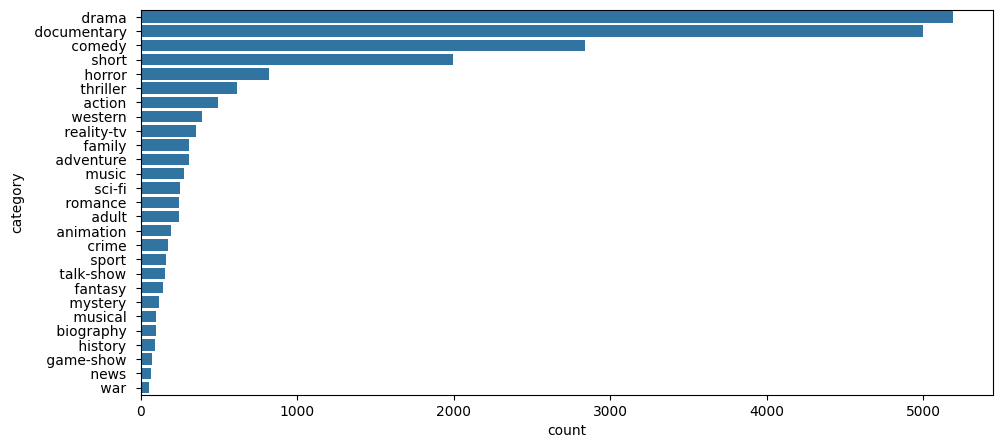

In [ ]:
plt.figure(figsize=(11,5))
data = train.category.value_counts()
sns.barplot(x=data,y=data.index,orient='h')
plt.show()

In [ ]:
combine = pd.concat([train, test], axis=0)
combine["category"] = combine["category"].fillna("Unknown")  # If NaN, replace with "Unknown"
combine["movie_name"] = combine["movie_name"].fillna("Unknown")  # If NaN, replace with "Unknown"
combine["confession"] = combine["confession"].fillna("")  # Replace NaN values with empty string
encoder = LabelEncoder()
combine["category"] = encoder.fit_transform(combine["category"])
combine["movie_name"] = encoder.fit_transform(combine["movie_name"])
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(combine["confession"])  # No need for `.fillna("")`
y = combine["category"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(x_train, y_train)
pred = naive_bayes_model.predict(x_test)
print("Naive Bayes Model")
print(classification_report(y_test, pred))
print("Accuracy Score:", accuracy_score(y_test, pred))

Naive Bayes Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        68
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        12
           5       0.45      0.02      0.03       560
           6       0.00      0.00      0.00        37
           7       0.00      0.00      0.00       967
           8       1.00      0.00      0.00      1076
           9       0.00      0.00      0.00        51
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00       166
          14       0.00      0.00      0.00        64
          15       0.00      0.00      0.00        23
          16       0.00      0.00      0.00        26
         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
